**Predicting Stock Prices using Regression Analysis**



In [2]:
#Import necessary libraries

import pandas as pd
import numpy as np

#Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit learn metrices, functions and models
from sklearn import metrics

In [4]:
#Load the CSV file and Reading the dataset

df= pd.read_csv('/content/google_stock.csv')
df.head(10)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,27.782366,27.839401,27.603037,27.724083,27.724083,73129082
1,2014-01-03,27.770908,27.818977,27.520098,27.521841,27.521841,66917888
2,2014-01-06,27.721344,27.867046,27.557707,27.828691,27.828691,71037271
3,2014-01-07,28.019974,28.385853,27.924334,28.365179,28.365179,102486711
4,2014-01-08,28.543015,28.575891,28.226450,28.424210,28.424210,90036218
5,2014-01-09,28.479254,28.498680,28.033922,28.150484,28.150484,83692529
6,2014-01-10,28.370661,28.370661,27.951481,28.148991,28.148991,86061375
7,2014-01-13,28.056587,28.565680,27.824955,27.969664,27.969664,97118665
8,2014-01-14,28.342516,28.667547,28.096935,28.627695,28.627695,99676216
9,2014-01-15,28.717112,28.767174,28.487970,28.608269,28.608269,78300393


In [5]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2465,2023-10-18,140.750000,141.990005,138.705002,139.279999,139.279999,18304900
2466,2023-10-19,139.800003,141.005005,138.600006,138.979996,138.979996,21831200
2467,2023-10-20,138.589996,139.039993,136.244995,136.740005,136.740005,24953900
2468,2023-10-23,136.229996,139.020004,135.110001,137.899994,137.899994,20780700
2469,2023-10-24,139.160004,140.710007,138.750000,140.119995,140.119995,26535200
2470,2023-10-25,129.770004,130.100006,126.089996,126.669998,126.669998,58796100
2471,2023-10-26,124.470001,125.459999,122.320000,123.440002,123.440002,33907400
2472,2023-10-27,124.029999,124.440002,121.459999,123.400002,123.400002,37367700
2473,2023-10-30,124.459999,126.550003,123.879997,125.750000,125.750000,24165600
2474,2023-10-31,126.269997,126.559998,123.925003,125.300003,125.300003,21123400


In [6]:
#Identify shape of the data

df.shape

(2475, 7)

In [8]:
#Data Preparation

#Drop variables we don't need

df = df.drop(columns=['Adj Close'], axis=1)

df.head()

,Date,Open,High,Low,Close,Volume
0,2014-01-02,27.782366,27.839401,27.603037,27.724083,73129082
1,2014-01-03,27.770908,27.818977,27.520098,27.521841,66917888
2,2014-01-06,27.721344,27.867046,27.557707,27.828691,71037271
3,2014-01-07,28.019974,28.385853,27.924334,28.365179,102486711
4,2014-01-08,28.543015,28.575891,28.226450,28.424210,90036218


In [7]:


#Look for duplicates
df.duplicated().sum().any()

False

In [9]:
#Check for null values

df.isnull().values.any()

False

In [10]:
#Checking and reviewind dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2475 non-null   object 
 1   Open    2475 non-null   float64
 2   High    2475 non-null   float64
 3   Low     2475 non-null   float64
 4   Close   2475 non-null   float64
 5   Volume  2475 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 116.1+ KB


In [12]:
#Overveiw Descriptive Statistic for the Data

df.describe()

,Open,High,Low,Close,Volume
count,2475.000000,2475.000000,2475.000000,2475.000000,2.475000e+03
mean,67.900203,68.626546,67.215891,67.935149,3.398511e+07
std,36.568450,37.022069,36.161771,36.589618,1.888355e+07
min,24.664783,24.730902,24.311253,24.560070,1.584340e+05
25%,37.460251,37.730751,37.092499,37.417000,2.307000e+07
50%,56.323502,57.021000,55.826000,56.373001,2.906157e+07
75%,97.189999,99.114502,95.697250,97.139999,3.818328e+07
max,151.863495,152.100006,149.887497,150.709000,2.234866e+08


In [13]:
#Check for correlations between variables

print(df.corr())

            Open      High       Low     Close    Volume
Open    1.000000  0.999798  0.999783  0.999526 -0.305455
High    0.999798  1.000000  0.999743  0.999780 -0.302507
Low     0.999783  0.999743  1.000000  0.999799 -0.311073
Close   0.999526  0.999780  0.999799  1.000000 -0.307699
Volume -0.305455 -0.302507 -0.311073 -0.307699  1.000000


<ipython-input-13-be730e63283f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


<ipython-input-14-5ebcabd0d74f>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = "Blues", annot=True)


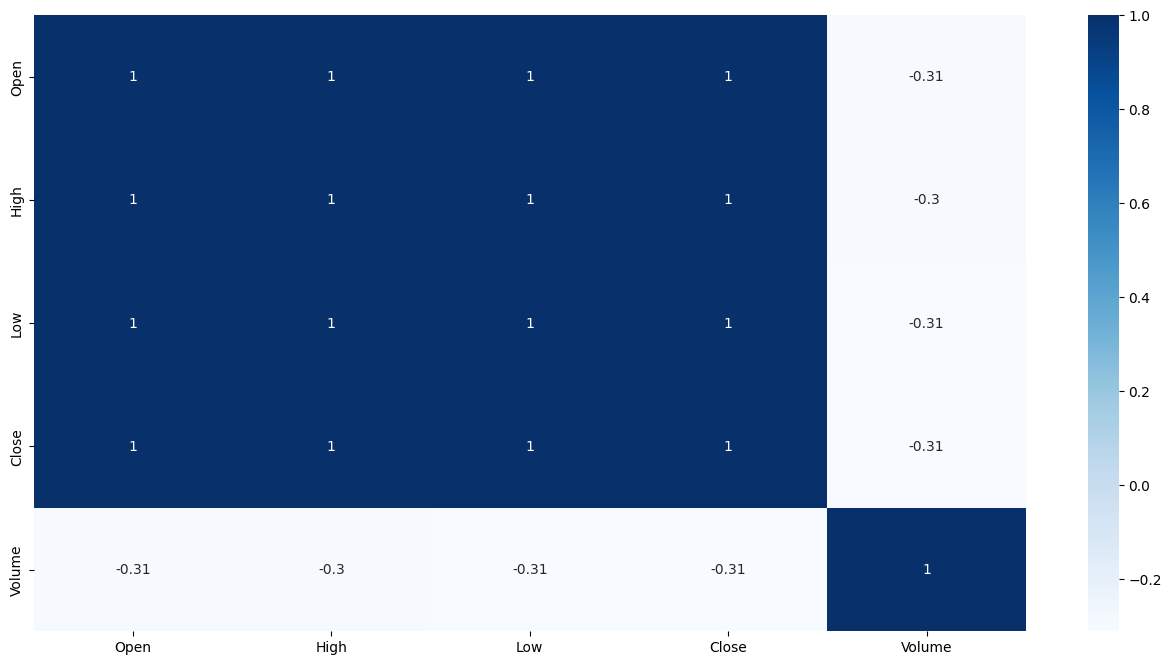

In [14]:
#Visualising Correlation

plt.figure(figsize=(16,8))

sns.heatmap(df.corr(), cmap = "Blues", annot=True)
plt.show()

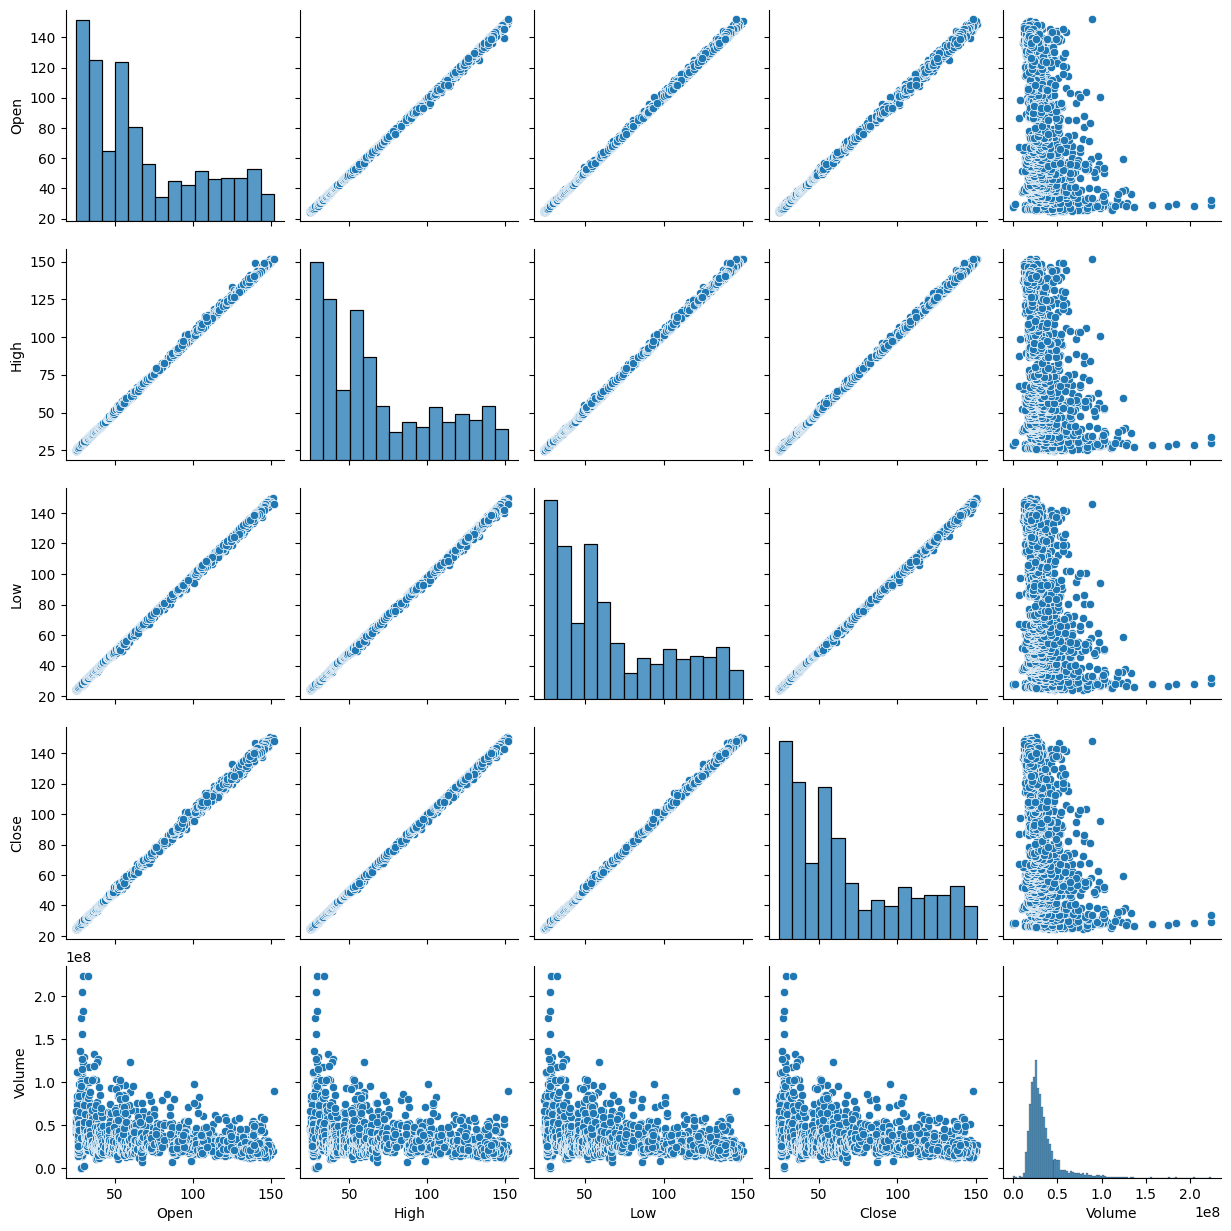

In [15]:
#Shwong visualisations on all variables in the data

sns.pairplot(df)

<Axes: >

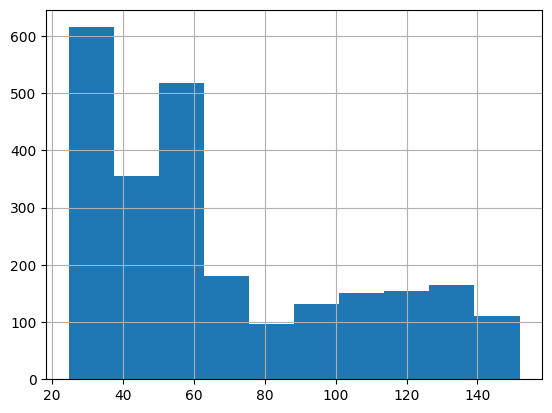

In [16]:
df['Open'].hist()

<Axes: >

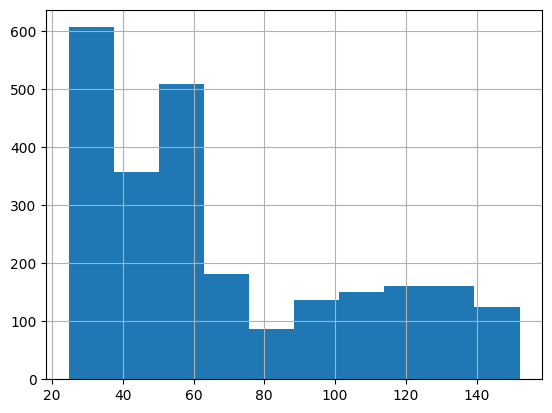

In [17]:
df['High'].hist()

<Axes: >

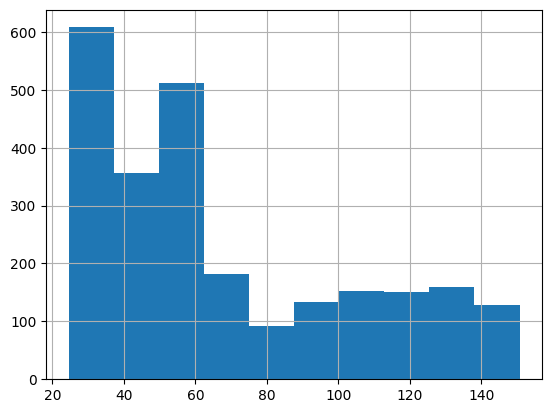

In [18]:
df['Close'].hist()

<Axes: >

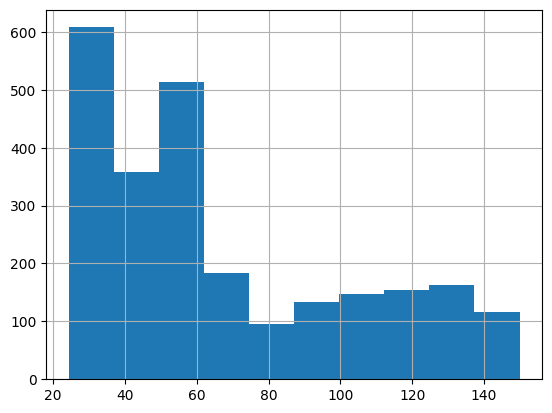

In [19]:
df['Low'].hist()

<Axes: >

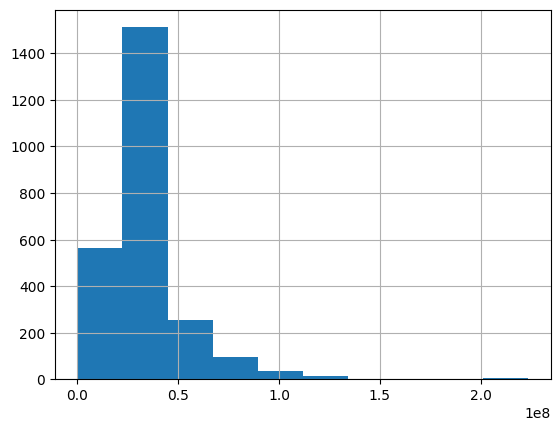

In [20]:
df['Volume'].hist()

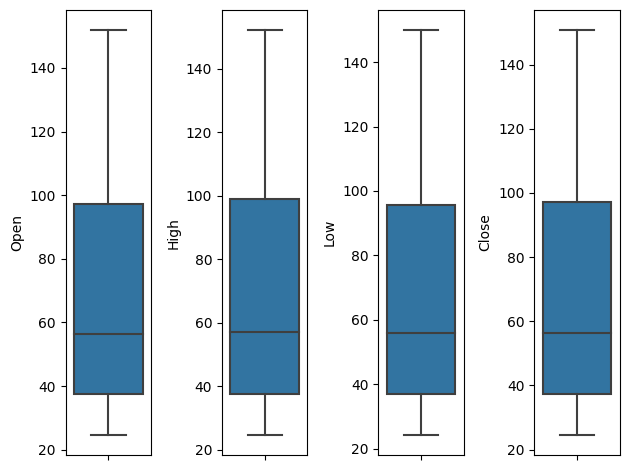

In [23]:
#Review box plots

f, axes= plt.subplots(1,4)
sns.boxplot(y='Open', data=df, ax=axes[0])
sns.boxplot(y='High', data=df, ax=axes[1])
sns.boxplot(y='Low', data=df, ax=axes[2])
sns.boxplot(y='Close', data=df, ax=axes[3])
plt.tight_layout()

In [26]:
import plotly.graph_objects as go

figure = go.Figure(data=[go.Candlestick(x=df['Date'],
                                        open=df['Open'], high=df['High'],
                                        low=df['Low'], close=df['Close'])])
figure.update_layout(title = 'Google Stock Price Analysis', xaxis_rangeslider_visible=False)
figure.show()

In [27]:
#Split dataset

X = df[['Open', 'High', 'Low', 'Volume']].values #independent values
y = df['Close'].values #dependent variable


In [29]:
#Split the data 80% train and 20% testing

from sklearn.model_selection import train_test_split
#Splitting the data 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)


In [30]:
#Checking the shape for train data

print('Train:',X_train.shape)
print('Test:', X_test.shape)

Train: (1980, 4)
Test: (495, 4)


In [31]:
#Training the Model Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

#Creating Regression Model
regressor = LinearRegression()

#Fit Linear regression model
model = regressor.fit(X_train, y_train)

#Use model to make prediction
y_pred = regressor.predict(X_test)

In [32]:
#Prediction

#With the test prediction completem the next step will better compare them
#With the actual output values for X_test by organizing time in a Dataframeformat:

predicted = regressor.predict(X_test)

In [33]:
#X_test shape

predicted.shape

(495,)

In [34]:
#Validating the Fit

#Printout relevant metrics
print('Model Coefficients:', regressor.coef_)
#Looking at the intercept
print('Model Intercept:', regressor.intercept_)

Model Coefficients: [-6.37073658e-01  7.70028365e-01  8.67468484e-01  3.31894179e-10]
Model Intercept: 0.024204825544231312


In [35]:
#Prediction Table of Actual Prices vs Predicted values

dframe = pd.DataFrame(y_test, predicted)
dfr = pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': predicted})
print(dfr)

     Actual_Price  Predicted_Price
0       30.598499        30.726341
1       67.178001        67.299710
2       57.641998        57.682945
3       75.439499        76.074012
4       75.777496        75.210875
..            ...              ...
490    119.306000       118.648484
491     79.522499        79.726717
492     38.542000        38.753416
493     52.234501        52.331735
494     51.083000        51.078112

[495 rows x 2 columns]


In [36]:
#Stats on Actual Price and Predicted price

dfr.describe()

,Actual_Price,Predicted_Price
count,495.000000,495.000000
mean,67.757339,67.732136
std,35.607439,35.572428
min,24.741074,24.804141
25%,38.439249,38.437781
50%,57.023998,57.108633
75%,91.783501,91.740132
max,149.351501,150.127004


<ipython-input-37-21b70592fd70>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

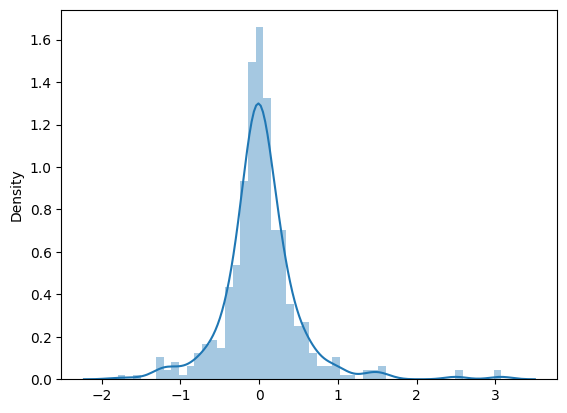

In [37]:
#Normality of Residual

#Difference of y_test values
residual = y_test - predicted
sns.distplot(residual)

In [38]:
#Checking p-value with right tailed or upper tailed test

import scipy.stats

#Finding p-value
p_value = scipy.stats.norm.sf(abs(1.67))
print('p value is : ' + str(p_value))

p value is : 0.04745968180294733


In [39]:
#Printing the OLS Regression Results model
results3 = sm.OLS(y_test, X_test).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.089e+06
Date:                Tue, 02 Jan 2024   Prob (F-statistic):                        0.00
Time:                        16:24:39   Log-Likelihood:                         -341.51
No. Observations:                 495   AIC:                                      691.0
Df Residuals:                     491   BIC:                                      707.8
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5667      0.035    -16.231      0.000      -0.635      -0.498
x2             0.8281      0.029     28.371      0.000       0.771       0.886
x3             0.7379      0.034     21.989      0.000       0.672       0.804
x4          9.781e-12   8.24e-10      0.012      0.991   -1.61e-09    1.63e-09
==============================================================================
Omnibus:                       93.168   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              921.120
Skew:                           0.468   Prob(JB):                    9.58e-201
Kurtosis:                       9.617   Cond. No.                     7.81e+07
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.81e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
#Checking the regression score
from sklearn.metrics import confusion_matrix, accuracy_score

regression_confidence = regressor.score(X_test, y_test)
print('Linear regression confidence: ', regression_confidence)

Linear regression confidence:  0.99980906932289


In [41]:
#Evaulating the Model - the closer to zero for all these metrics the better

import math

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, predicted))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error: ', math.sqrt(metrics.mean_squared_error(y_test, predicted)))



Mean Absolute Error:  0.30602743464327936
Mean Squared Error:  0.24158999887564742
Root Mean Squared Error:  0.49151805549302807


In [42]:
#Model Accuracy

x2 = abs(predicted- y_test)
y2 = 100 * (x2 / y_test)
accuracy = 100 - np.mean(y2)
print('Accuracy: ', round(accuracy, 2), '%.')

Accuracy:  99.57 %.


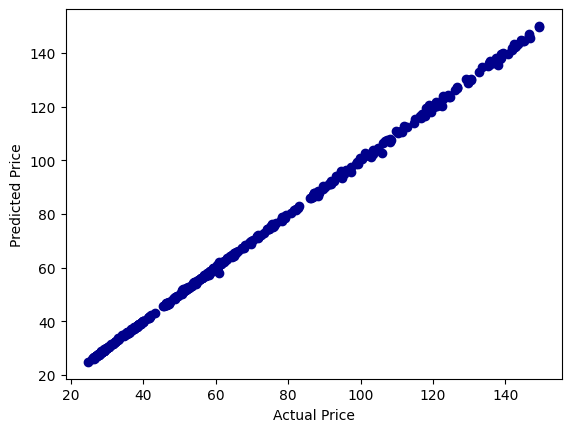

In [43]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price, color= 'Darkblue')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

<Axes: >

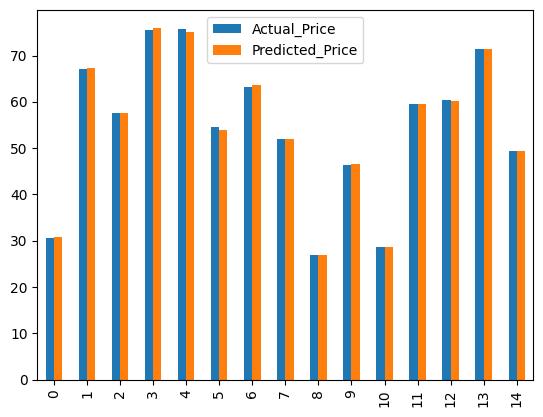

In [44]:
#Graphing the first 20 values

graph = dfr.head(15)
graph.plot(kind= 'bar')